# 1. 응용하기

# 1.1 모듈

## 1.1.1 if __name__=="__main__": 의미

In [1]:
import mod1 as m1

mod1
5
2


In [2]:
!python3 mod1.py

__main__
5
2


In [3]:
print(m1.add(3, 4))
print(m1.add(8, 4))
print(m1.sub(3, 4))
print(m1.sub(9, 3))

7
12
-1
6


In [4]:
from mod1 import add , sub
print(add(55,13))
print(sub(55,13))

68
42


In [6]:
m1.__name__

'mod1'

## 1.1.2 클래스나 변수 등을 포함한 모듈

In [16]:
import mod2
a = mod2.Math()
print(mod2.PI)
print(a.solv(10))

3.141592
314.1592


In [13]:
from mod2 import Math,PI
a = Math()
print(PI)
print(a.solv(10))

3.141592
314.1592


## 1.1.3 다른 디렉터리에 있는 모듈을 불러오는 방법

In [21]:
# %%sh
# mkdir ./mymod
# mv mod2.py ./mymod/mymod2.py # mv 무브지만 이름변경도

In [26]:
import mymod2

ModuleNotFoundError: No module named 'mymod2'

In [12]:
import sys
# !pwd # /home/cjh/data
# sys.path에 mymod2가 위치한 절대경로를 추가함.
sys.path.append("/home/cjh/data/mymod/")

In [13]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/cjh/venv/lib/python3.12/site-packages',
 '/home/cjh/data/mymod/',
 '/home/cjh/data/mymod/']

In [24]:
# PYTHONPATH 환경 변수 등 등록 하여 사용할 수 있다.

## 1.1.4 !python3 -V

# 패키지

In [62]:
%%sh
mkdir game
mkdir game/sound
mkdir game/graphic
mkdir game/play

mkdir: cannot create directory ‘game’: File exists
mkdir: cannot create directory ‘game/sound’: File exists
mkdir: cannot create directory ‘game/graphic’: File exists
mkdir: cannot create directory ‘game/play’: File exists


CalledProcessError: Command 'b'mkdir game\nmkdir game/sound\nmkdir game/graphic\nmkdir game/play\n'' returned non-zero exit status 1.

In [46]:
import os
os.makedirs("game/sound", exist_ok=True)
os.makedirs("game/graphic", exist_ok=True)
os.makedirs("game/play", exist_ok=True)

In [59]:
%%sh
echo "" > /home/cjh/data/game/__init__.py
echo "" > /home/cjh/data/game/sound/__init__.py
echo "" > /home/cjh/data/game/graphic/__init__.py
echo "" > /home/cjh/data/game/play/__init__.py

In [23]:
%%sh
echo "def echo_test():\n\tprint('echo')" > /home/cjh/data/game/sound/echo.py
echo "def echo_test():\n\tprint('echo')" > /home/cjh/data/game/graphic/render.py

# 1.2.1 패키지 안의 함수 실행하기

In [24]:
'''1'''
# import game.sound.echo
# game.sound.echo.echo_test()
'''2'''
# import game.sound.echo as ec
# ec.echo_test()
'''3'''
# from game.sound import echo
# echo.echo_test()
'''4'''
from game.sound.echo import echo_test
echo_test()

echo


In [3]:
f = open("/home/cjh/data/game/__init__.py","w")
st='''VERSION = 4.5

def print_version_info():
    print(f"The version of this game is {VERSION}. ")
'''

f.write(st)
f.close()

In [4]:
import game
print(game.VERSION)
game.print_version_info()

4.5
The version of this game is 4.5. 


## 패키지 내 모듈을 미리 

In [1]:
st='''from.graphic.render import render_test

VERSION = 4.6

def print_version_info():
    print(f"The version of this game is {VERSION}.")
'''
with open("/home/cjh/data/game/__init__.py","w") as f:
    f.write(st)

In [2]:
import game
game.render_test()

ModuleNotFoundError: No module named 'game.graphic.graphic'

### 패키지 초기화

In [3]:
st='''from .graphic.render import render_test

VERSION = 4.7

def print_version_info():
    print(f"The version of this game is {VERSION}.")

print("Initializing game ...")
'''
with open("/home/cjh/data/game/__init__.py","w") as f:
    f.write(st)

In [4]:
import game

ModuleNotFoundError: No module named 'game.graphic.graphic'

In [3]:
from game.graphic.render import render_test

ModuleNotFoundError: No module named 'game.graphic.graphic'

## 1.2.4 all (*)

In [1]:
from game.sound import *

ModuleNotFoundError: No module named 'game.graphic.graphic'

In [2]:
with open("/home/cjh/data/game/sound/__init__.py","w") as f:
    f.write("__all__ = ['echo']")

In [4]:
echo.echo_test()

NameError: name 'echo' is not defined

# 상대경로 패키지

In [12]:
st='''from .graphic.render import echo_test
# from ..sound.echo import echo_test
def render_test():
    print("render")
    echo_test()
'''
with open("/home/cjh/data/game/graphic/render.py","w") as f:
    f.write(st)

In [5]:
from game.graphic.render import render_test
render_test()

ModuleNotFoundError: No module named 'game.graphic.graphic'

# 2. 예외 처리

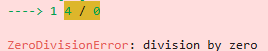

In [1]:
try: 
    4 / 0
except ZeroDivisionError as e:
    print(e)

division by zero


In [1]:
try: 
    4 / 0
except ZeroDivisionError as e:
    print(e)
finally:
    print("응?")

division by zero
응?


In [6]:
try:
    f = open('foo.txt', 'w')
    # 무언가를 수행한다.

finally:
    f.close() # 중간에 오류가 발생하더라도 무조건 실행된다.
    print("파일을 열고 닫았습니다.")

파일을 열고 닫았습니다.


In [10]:
# 먼저 만나는 오류를 출력
try:
    a = [1,2]
    print(a[3])
    4/0
    print("나는 멋져")
except ZeroDivisionError as e:
    print("0으로 나눌 수 없습니다.", e)
except IndexError as e:
    print("인덱싱 할 수 없습니다.", e)

인덱싱 할 수 없습니다. list index out of range


In [12]:
# 먼저 만나는 오류를 출력
try:
    age = int(input('나이를 입력하세요: '))
except:
        print('미성년자는 출입금지입니다.')
else:
    try:
        if age <= 18:
            print('미성년자는 출입금지입니다.')
        else:
            print('환영합니다.')
    except:
        print("프로그램 점검요망.")

나이를 입력하세요:  12


미성년자는 출입금지입니다.


In [19]:
# 오류 회피하기
students = ['김철수', '이영희', '박민수', '최유진']

for (i, student) in enumerate(students, 1):
    try:
        with open(f"{student}_성적.txt",'r') as f:
            score = f.read()
            print(f"{student}의 성적: {score}")
    except:
            print(f"{student}의 성적 파일이 없습니다. 건너뜁니다.")
            continue

김철수의 성적 파일이 없습니다. 건너뜁니다.
이영희의 성적 파일이 없습니다. 건너뜁니다.
박민수의 성적 파일이 없습니다. 건너뜁니다.
최유진의 성적 파일이 없습니다. 건너뜁니다.


In [28]:
class Bird:
    def fly(self):
        # print("난다날어~! 나는누구 여긴어디~")
        # raise NotImplementedError
        raise "정의해주세요."

In [29]:
a = Bird()
a.fly()

TypeError: exceptions must derive from BaseException

In [30]:
class Eagle(Bird):
    def fly(self):
        print("난 진짜 난다!")

In [31]:
e = Eagle()
e.fly()

난 진짜 난다!


In [34]:
class MyError(Exception):
    def __str__(self): #프린트 전용 구축
        return "나는 바보가 아냐! 코훌쩍..."

In [36]:
def say_nick(nick):
    if nick == '바보':
        raise MyError()
    print(nick)

In [38]:
try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print(e)

천사

